30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [1]:
data = list()
with open("neko.txt.mecab","r") as buffers:
    for l in buffers:
        if l == 'EOS':
            break
        i = l.split("\t")
        d = dict()
        d = {'surface':i[0], 'base':i[3], 'pos':i[4], 'pos1':i[5]}
        data.append(d)
data[:10]

[{'surface': '一', 'base': '一', 'pos': '名詞-数詞', 'pos1': ''},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '空白', 'pos1': ''},
 {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞', 'pos1': ''},
 {'surface': 'は', 'base': 'は', 'pos': '助詞-係助詞', 'pos1': ''},
 {'surface': '猫', 'base': '猫', 'pos': '名詞-普通名詞-一般', 'pos1': ''},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '助動詞-ダ'},
 {'surface': 'ある', 'base': '有る', 'pos': '動詞-非自立可能', 'pos1': '五段-ラ行'},
 {'surface': '。', 'base': '。', 'pos': '補助記号-句点', 'pos1': ''},
 {'surface': '名前', 'base': '名前', 'pos': '名詞-普通名詞-一般', 'pos1': ''},
 {'surface': 'は', 'base': 'は', 'pos': '助詞-係助詞', 'pos1': ''}]

31. 動詞

動詞の表層形をすべて抽出せよ．

In [2]:
doushi = list()
for i in data:
    if '動詞' in i['pos']:
        doushi.append(i)
doushi[:10]

[{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '助動詞-ダ'},
 {'surface': 'ある', 'base': '有る', 'pos': '動詞-非自立可能', 'pos1': '五段-ラ行'},
 {'surface': '生れ', 'base': '生まれる', 'pos': '動詞-一般', 'pos1': '下一段-ラ行'},
 {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '助動詞-タ'},
 {'surface': 'んと', 'base': 'うんと', 'pos': '感動詞-フィラー', 'pos1': ''},
 {'surface': 'つか', 'base': '付く', 'pos': '動詞-非自立可能', 'pos1': '五段-カ行'},
 {'surface': 'ぬ', 'base': 'ず', 'pos': '助動詞', 'pos1': '助動詞-ヌ'},
 {'surface': 'し', 'base': '為る', 'pos': '動詞-非自立可能', 'pos1': 'サ行変格'},
 {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '助動詞-タ'},
 {'surface': '泣い', 'base': '泣く', 'pos': '動詞-一般', 'pos1': '五段-カ行'}]

32. 動詞の原形

動詞の基本形をすべて抽出せよ．

In [3]:
doushi_base = list()
for i in doushi:
    doushi_base.append(i['base'])
doushi_base[:10]

['だ', '有る', '生まれる', 'た', 'うんと', '付く', 'ず', '為る', 'た', '泣く']

33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [4]:
A_no_B = list()

for i in range(2,len(data)):
    if '名詞' in data[i-2]['pos'] and 'の' in data[i-1]['surface'] and '名詞' in data[i]['pos']:
        A_no_B.append(data[i-2]['surface']+data[i-1]['surface']+data[i]['surface'])
A_no_B[-10:]

['吾輩の足',
 '水の面',
 '甕の縁',
 '甕のふち',
 '年の間',
 '自然の力',
 '水の中',
 '座敷の上',
 '楽そのもの',
 '不可思議の太平']

34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [5]:
nameoflist = list()
sum = list()

for i in data:
    if '名詞' in i['pos']: 
        sum.append(i['surface'])
    else:
        if len(sum) > 0: 
            nameoflist.append(sum)
        sum = list()

# ほんとは全て抜き出す必要あるだろうけどめんどくさいので。。
''.join(max(nameoflist, key=lambda x: len(x)))

'明治三十八年何月何日戸締り'

35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [6]:
# 標準ライブラリのCounter
from collections import Counter

common = Counter([d['surface'] for d in data]).most_common()
common[:20]

[('の', 9543),
 ('。', 7486),
 ('て', 7417),
 ('に', 7058),
 ('、', 6773),
 ('は', 6501),
 ('と', 6157),
 ('を', 6119),
 ('が', 5395),
 ('で', 4543),
 ('た', 3974),
 ('も', 3238),
 ('「', 3238),
 ('」', 3238),
 ('だ', 2705),
 ('し', 2528),
 ('ない', 2423),
 ('から', 2213),
 ('か', 2040),
 ('ある', 1730)]

36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12390 (\N{HIRAGANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWa

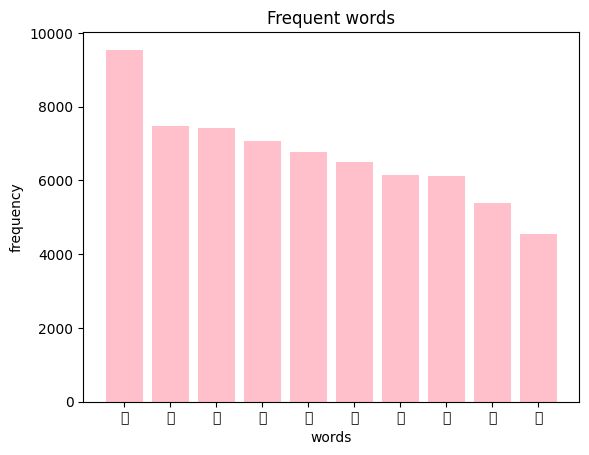

In [7]:
import matplotlib.pyplot as plt

x_values = list()
y_values = list()

for i in common[:10]:
    x_values.append(i[0])
    y_values.append(i[1])

plt.bar(x_values, y_values, color='pink')
plt.title('Frequent words')
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()


37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

/Users/taketsunaichiyanagi/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12384 (\N{HIRAGANA LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


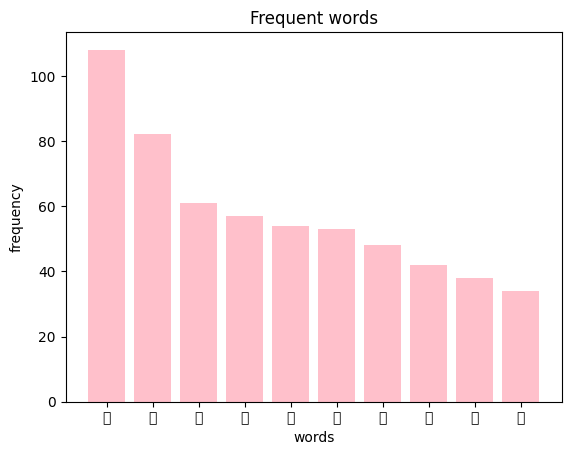

In [8]:
surface = [d['surface'] for d in data]
target_word = "猫"

co_occurrences = []
for i, word in enumerate(surface):
    if word == target_word:
        window_start = max(0, i - 3)
        window_end = min(len(surface), i + 4)
        context_words = surface[window_start:i] + surface[i+1:window_end]
        co_occurrences.extend(context_words)

co_occurrence_counts = Counter(co_occurrences).most_common()

x_values = list()
y_values = list()

for i in co_occurrence_counts[:10]:
    x_values.append(i[0])
    y_values.append(i[1])

plt.bar(x_values, y_values, color='pink')
plt.title('Frequent words')
plt.xlabel('words')
plt.ylabel('frequency')
plt.show()

38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

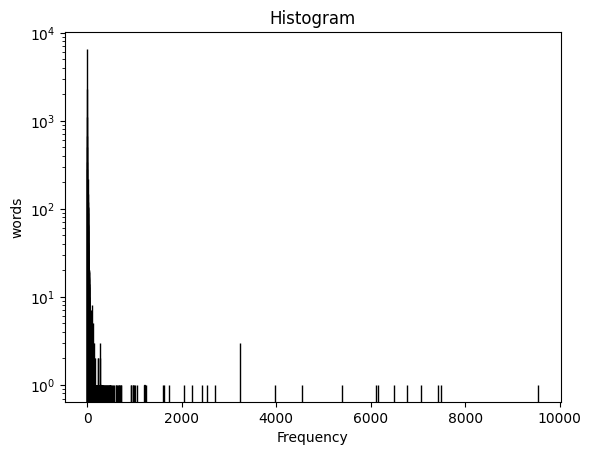

In [9]:
y_values = list()

for i in common:
    y_values.append(i[1])

plt.hist(y_values, bins=len(y_values), color='blue', edgecolor='black')
plt.yscale('log')
plt.title('Histogram')
plt.xlabel('Frequency')
plt.ylabel('words')
plt.show()

39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

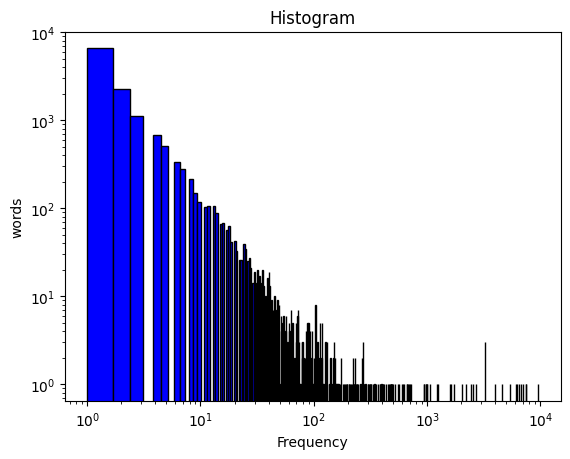

In [10]:
y_values = list()

for i in common:
    y_values.append(i[1])

plt.hist(y_values, bins=len(y_values), color='blue', edgecolor='black')
plt.yscale('log')
plt.xscale('log')
plt.title('Histogram')
plt.xlabel('Frequency')
plt.ylabel('words')
plt.show()